In [10]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings
import sys
import dabest
from scipy import stats
import statsmodels.stats.multicomp as mc

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from PVcorrelation import GetData as gd

In [3]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
LickFolder = '/Users/seetha/Box Sync/MultiDayData/LickData/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/PV_correlation/'

## Without Task5

In [4]:
TaskDict = {'Task1': '1 Fam Rew',
            'Task2': '2 Fam Rew',
            'Task3': '3 No Rew',
            'Task4': '4 No Rew'}
pv = gd(FolderName=DirectoryName, LickFolder=LickFolder, taskdict=TaskDict)
corr = pv.average_pv_corr()
# corr = pv.corr_animal[pv.animals[2]]

NR34
11 (16, 1358, 40)
(4, 1358, 40)
CFC17
6 (36, 546, 40)
(4, 546, 40)
NR32
2 (20, 988, 40)
(4, 988, 40)
CFC16
3 (26, 2225, 40)
(4, 2225, 40)
CFC18
6 (18, 1763, 40)
(4, 1763, 40)


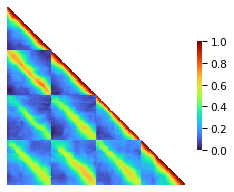

In [5]:
mask = np.triu(np.ones_like(corr, dtype=bool))
fs, ax = plt.subplots(1)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="turbo", vmin=0, vmax=1, linewidths=0., 
            cbar_kws={"shrink": .5}, square=True)
ax.axis('off')
fs.set_size_inches((4, 4))
fs.savefig(os.path.join(SaveFigureFolder, 'PV_heatmap.tif'), bbox_inches='tight', dpi=300)

### Diagonol

In [6]:
diag_m = pv.collect_pop_vec_diag()
diag_m['ID'] = diag_m.index

(200,)


In [7]:
scipy.stats.ks_2samp(diag_m['Task1_Task2'], diag_m['Task3_Task4'])

KstestResult(statistic=0.48, pvalue=3.1330954373417528e-21)

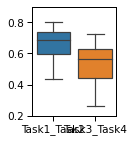

In [8]:
fs, ax = plt.subplots(1)
sns.boxplot(data=diag_m[['Task1_Task2', 'Task3_Task4']], ax=ax, showfliers=False)
ax.set_ylim((0.2, 0.9))
fs.set_size_inches(1.5, 2)
fs.savefig(os.path.join(SaveFigureFolder, 'PV_boxplot_diag.pdf'), bbox_inches='tight', dpi=300)

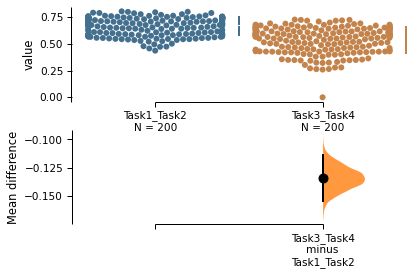

In [9]:
fs, ax = plt.subplots(1)
sequential_repeated_measures = dabest.load(diag_m, idx=('Task1_Task2', 'Task3_Task4'),
                                             id_col="ID")
sequential_repeated_measures.mean_diff.plot(ax=ax, float_contrast=False);
fs.savefig(os.path.join(SaveFigureFolder, 'PV_diag_dabest.pdf'), bbox_inches='tight', dpi=300)

In [14]:
m, sem = pv.calculate_mean_trace_bettasks()
tasklist = ['Task1_Task2',
            'Task3_Task4']
subset_m = m[tasklist]
subset_s = sem[tasklist]
t, p = scipy.stats.ttest_rel(subset_m[tasklist[0]], subset_m[tasklist[1]])
print(p)

0.003076617626780578


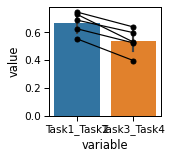

In [11]:
fs, ax = plt.subplots()
sns.barplot(x='variable', y='value', data=subset_m.melt())
for index, i in subset_m.iterrows():
    plt.plot(range(len(tasklist)), i, 'ko-', markersize=5)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Stabilityacrossdays.pdf'), bbox_inches='tight')

In [19]:
diag_m

,Task1_Task2,Task1_Task3,Task1_Task4,Task2_Task1,Task2_Task3,Task2_Task4,Task3_Task1,Task3_Task2,Task3_Task4,Task4_Task1,Task4_Task2,Task4_Task3,ID
0,0.708965,0.307701,0.575225,0.708965,0.325648,0.625404,0.307701,0.325648,0.460237,0.575225,0.625404,0.460237,0
1,0.676892,0.287372,0.546018,0.676892,0.277472,0.624976,0.287372,0.277472,0.440189,0.546018,0.624976,0.440189,1
2,0.674292,0.243689,0.554228,0.674292,0.227263,0.609343,0.243689,0.227263,0.429850,0.554228,0.609343,0.429850,2
3,0.706401,0.241323,0.572871,0.706401,0.220697,0.633409,0.241323,0.220697,0.458579,0.572871,0.633409,0.458579,3
4,0.730613,0.232500,0.588055,0.730613,0.200697,0.629006,0.232500,0.200697,0.464053,0.588055,0.629006,0.464053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.742177,0.525451,0.618686,0.742177,0.580577,0.611604,0.525451,0.580577,0.676960,0.618686,0.611604,0.676960,195
196,0.745368,0.515133,0.601308,0.745368,0.570693,0.587638,0.515133,0.570693,0.674321,0.601308,0.587638,0.674321,196
197,0.751067,0.490813,0.582321,0.751067,0.544753,0.575197,0.490813,0.544753,0.655170,0.582321,0.575197,0.655170,197
198,0.760380,0.453214,0.559891,0.760380,0.494039,0.559174,0.453214,0.494039,0.640700,0.559891,0.559174,0.640700,198


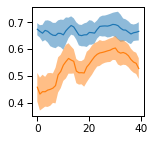

In [5]:
tasklist = ['Task1_Task2',
            'Task3_Task4']
d = pv.plot_diag_by_pos()
fs, ax = plt.subplots(1)
for t in tasklist:
    m = np.nanmean(np.asarray(d[t]), 0)
    sem = scipy.stats.sem(np.asarray(d[t]), 0, nan_policy='omit')
    ax.plot(m)
    ax.fill_between(np.arange(np.size(m)), m - sem, m + sem, alpha=0.5)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Stabilityacrosstracklength.pdf'), bbox_inches='tight')

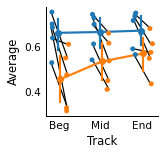

In [7]:
fs, ax = plt.subplots(1)
tasklist = ['Task1_Task2',
            'Task3_Task4']
trackdata = pv.get_mean_error_withtrack(ax, d, tasklist)

#Join lines
x = [[-0.20, 0.20], [0.8, 1.20], [1.8, 2.20]]
for n, t in enumerate(['Beg', 'Mid', 'End']):
    pivottable = trackdata[trackdata['Track']==t][['Task', 'Animal', 'Average']].pivot(columns=['Task'], index=['Animal'])
    for r, v in pivottable.iterrows():
        ax.plot(x[n], v.values, 'k-', zorder=1)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'meanstabilityacrosstracklength.pdf'), bbox_inches='tight')

In [11]:
comp1 = mc.MultiComparison(trackdata['Average'], trackdata['Track'])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_rel, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
Beg,End,-1.7433,0.1152,0.3457,False
Beg,Mid,-1.5262,0.1613,0.4839,False
End,Mid,1.2842,0.2311,0.6934,False


In [12]:
track = ['Beg', 'Mid', 'End']
for t in track:
    data1 = trackdata[(trackdata['Task']==tasklist[0]) & (trackdata['Track']==t)]['Average']
    data2 = trackdata[(trackdata['Task']==tasklist[1]) & (trackdata['Track']==t)]['Average']
    tstat, p = scipy.stats.ttest_rel(data1, data2)
    print('%s %0.3f %0.3f' %(t, tstat, p))

Beg 3.791 0.019
Mid 6.097 0.004
End 3.801 0.019


## With Re-reward

In [28]:
TaskDict = {'Task1': '1 Fam Rew',
            'Task2': '2 Fam Rew',
            'Task3': '3 No Rew',
            'Task4': '4 No Rew',
           'Task5': '5 Re Rew'}
pv = gd(FolderName=DirectoryName, LickFolder=LickFolder, taskdict=TaskDict)
corr = pv.average_pv_corr()

NR34
11 (16, 1358, 40)
CFC17
6 (36, 546, 40)
NR32
2 (20, 988, 40)
CFC16
3 (26, 2225, 40)
CFC18
6 (18, 1763, 40)


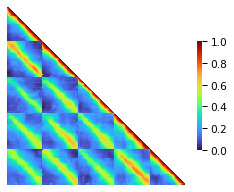

In [29]:
mask = np.triu(np.ones_like(corr, dtype=bool))
fs, ax = plt.subplots(1)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="turbo", vmin=0, vmax=1, linewidths=0., 
            cbar_kws={"shrink": .5}, square=True)
ax.axis('off')
fs.set_size_inches((4, 4))
fs.savefig(os.path.join(SaveFigureFolder, 'PV_heatmap_withrereward.tif'), bbox_inches='tight', dpi=300)

### Diagonol

In [36]:
diag_m = pv.collect_pop_vec_diag()
diag_m['ID'] = diag_m.index

(200,)


In [31]:
tasklist = ['Task1_Task5',
            'Task2_Task5',
           'Task3_Task5',
           'Task4_Task5']

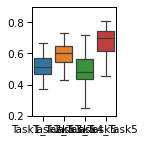

In [32]:
fs, ax = plt.subplots(1)
sns.boxplot(data=diag_m[tasklist], ax=ax, showfliers=False)
ax.set_ylim((0.2, 0.9))
fs.set_size_inches(1.5, 2)
fs.savefig(os.path.join(SaveFigureFolder, 'PV_boxplot_diag_rereward.pdf'), bbox_inches='tight', dpi=300)

In [33]:
subset_m = diag_m[tasklist].melt()
comp1 = mc.MultiComparison(subset_m['value'], subset_m['variable'])
tbl, a1, a2 = comp1.allpairtest(stats.ks_2samp, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
Task1_Task5,Task2_Task5,0.44,0.0,0.0,True
Task1_Task5,Task3_Task5,0.205,0.0004,0.0026,True
Task1_Task5,Task4_Task5,0.685,0.0,0.0,True
Task2_Task5,Task3_Task5,0.485,0.0,0.0,True
Task2_Task5,Task4_Task5,0.475,0.0,0.0,True
Task3_Task5,Task4_Task5,0.705,0.0,0.0,True


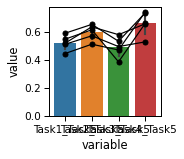

In [40]:
fs, ax = plt.subplots()
m, sem = pv.calculate_mean_trace_bettasks()
subset_m = m[tasklist]
sns.barplot(x='variable', y='value', data=subset_m.melt())
for index, i in subset_m.iterrows():
    plt.plot(range(len(tasklist)), i, 'ko-', markersize=5)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Stabilityacrossdays_rereward.pdf'), bbox_inches='tight')

In [41]:
from scipy import stats
import statsmodels.stats.multicomp as mc
subset_m = m[tasklist].melt() 
comp1 = mc.MultiComparison(subset_m['value'], subset_m['variable'])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_rel, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
Task1_Task5,Task2_Task5,-7.1168,0.0021,0.0124,True
Task1_Task5,Task3_Task5,0.7802,0.4788,1.0,False
Task1_Task5,Task4_Task5,-3.1649,0.034,0.2041,False
Task2_Task5,Task3_Task5,3.0952,0.0364,0.2183,False
Task2_Task5,Task4_Task5,-1.4773,0.2137,1.0,False
Task3_Task5,Task4_Task5,-3.4593,0.0258,0.155,False


## With common cells

In [75]:
TaskDict = {'Task1': '1 Fam Rew',
            'Task2': '2 Fam Rew',
            'Task3': '3 No Rew',
            'Task4': '4 No Rew',
           'Task5': '5 Re Rew'}
pv = gd(FolderName=DirectoryName, LickFolder=LickFolder, taskdict=TaskDict, get_commoncells=True)
corr = pv.average_pv_corr()

NR34
11 (16, 1358, 40)
(5, 96, 40)
CFC17
6 (36, 546, 40)
(5, 120, 40)
NR32
2 (20, 988, 40)
(5, 64, 40)
CFC16
3 (26, 2225, 40)
(5, 140, 40)
CFC18
6 (18, 1763, 40)
(5, 238, 40)


(0.0, 200.0, 200.0, 0.0)

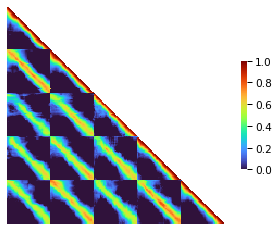

In [76]:
mask = np.triu(np.ones_like(corr, dtype=bool))
fs, ax = plt.subplots(1)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="turbo", vmin=0, vmax=1, linewidths=0., 
            cbar_kws={"shrink": .5}, square=True)
ax.axis('off')